# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Introduction to Statistics in Python (V) - Basics

### <span style="color:red"> *PLEASE ENTER THIS CELL AND WRITE YOUR NAME HERE:*_____________________________ </span>

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

The notebook is based on:
- https://github.com/rouseguy/intro2stats
- https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/
- https://towardsdatascience.com/visualizing-the-central-limit-theorem-with-python-e89d2ce41788

A great intro to stats in Machine Learning:
https://machinelearningmastery.com/statistics_for_machine_learning/

Machine learning and predictive modeling are a computer science perspective on modeling
data with a focus on algorithmic methods and model skill.
- Statistics and statistical learning are a mathematical perspective on modeling data with a focus on data models and on goodness of fitt.
- Machine learning practitioners must keep an open mind and leverage methods and understand the terminology from the closely related fields of applied statistics and statistical learning.

From: Brownlee, J. (2018). Statistical Methods for Machine Learning: Discover how to Transform Data into Knowledge with Python. Machine Learning Mastery.

# Basic Metrics

When we think about summarizing data, what are the metrics that we look at?

In this notebook, we will look in the price of weed dataset along with the demographic information of the United States. 

To read how the data was acquired, please read [this](https://github.com/amitkaps/weed/blob/master/1-Acquire.ipynb) to get more information

This notebook will make use of pandas quite a bit.

In [1]:
import numpy as np
import pandas as pd

import os

from datetime import datetime as dt

# scipy = Scientific Python - a library with various statistical and Machine Learning tools
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the input datasets. There are three datasets:

1. Weed price by date / state (We would be using Marijuana prices in various states of the USA, along with demographic data of the USA based on the latest census data)
2. Demographics of State
3. Population of state

In [10]:
PTH = r'C:\Users\bartf\Downloads\Data5'

prices_pd = pd.read_csv(os.path.join(PTH, "Weed_Price.csv"), parse_dates=[-1])
demography_pd = pd.read_csv(os.path.join(PTH, "Demographics_State.csv"))
population_pd = pd.read_csv(os.path.join(PTH, "Population_State.csv"))

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Please check the dimensions of each database, and check the head of each database.

</div>

In [9]:
prices_pd.shape
prices_pd.head

<bound method NDFrame.head of                State   HighQ  HighQN    MedQ  MedQN    LowQ  LowQN       date
0            Alabama  339.06    1042  198.64    933  149.49    123 2014-01-01
1             Alaska  288.75     252  260.60    297  388.58     26 2014-01-01
2            Arizona  303.31    1941  209.35   1625  189.45    222 2014-01-01
3           Arkansas  361.85     576  185.62    544  125.87    112 2014-01-01
4         California  248.78   12096  193.56  12812  192.92    778 2014-01-01
...              ...     ...     ...     ...    ...     ...    ...        ...
22894       Virginia  364.98    3513  293.12   3079     NaN    284 2014-12-31
22895     Washington  233.05    3337  189.92   3562     NaN    160 2014-12-31
22896  West Virginia  359.35     551  224.03    545     NaN     60 2014-12-31
22897      Wisconsin  350.52    2244  272.71   2221     NaN    167 2014-12-31
22898        Wyoming  322.27     131  351.86    197     NaN     12 2014-12-31

[22899 rows x 8 columns]>

In [8]:
demography_pd.shape

(51, 9)

In [11]:
population_pd.shape

(51, 2)

,region,value
0,alabama,4777326
1,alaska,711139
2,arizona,6410979
3,arkansas,2916372
4,california,37325068


<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Plot the population for each state on one plot.

</div>

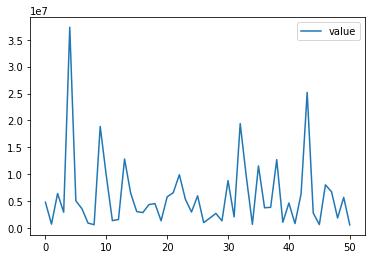

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

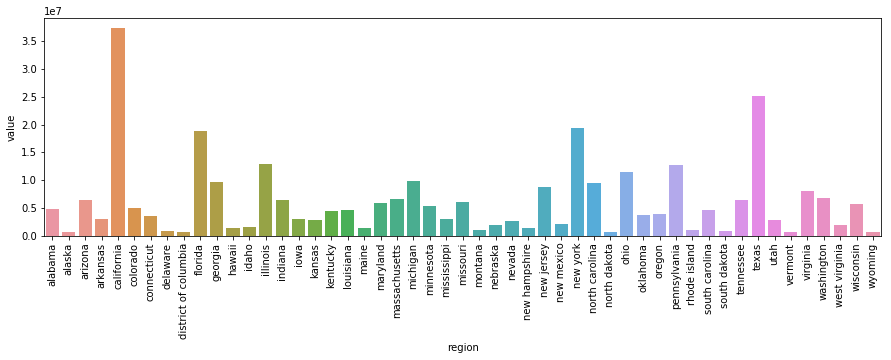

OR

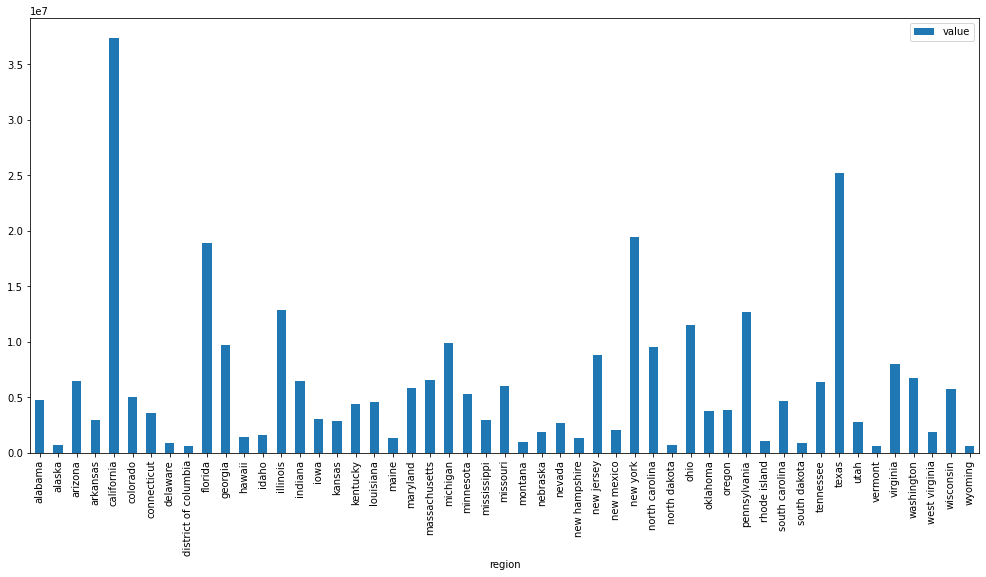

309138711

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Plot the price of HighQ across the dates in California.

</div>

In [21]:
California_prices = prices_pd[prices_pd['State'] == 'California']

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01
55,California,243.96,16512,189.35,19151,NaN,1096,2015-01-01
106,California,248.20,12571,192.80,13406,191.94,804,2014-02-01
157,California,243.30,16904,188.95,19764,NaN,1123,2015-02-01
208,California,247.60,12988,192.97,13906,191.40,839,2014-03-01
259,California,246.76,13396,192.91,14527,191.98,863,2014-04-01
310,California,246.04,13787,191.89,15047,191.40,891,2014-05-01
361,California,245.71,14178,192.27,15588,190.06,930,2014-06-01
412,California,241.92,18468,187.87,22012,NaN,1231,2015-06-01
463,California,245.39,14539,191.94,16092,188.57,949,2014-07-01


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01
55,California,243.96,16512,189.35,19151,NaN,1096,2015-01-01
106,California,248.20,12571,192.80,13406,191.94,804,2014-02-01
157,California,243.30,16904,188.95,19764,NaN,1123,2015-02-01
208,California,247.60,12988,192.97,13906,191.40,839,2014-03-01
259,California,246.76,13396,192.91,14527,191.98,863,2014-04-01
310,California,246.04,13787,191.89,15047,191.40,891,2014-05-01
361,California,245.71,14178,192.27,15588,190.06,930,2014-06-01
412,California,241.92,18468,187.87,22012,NaN,1231,2015-06-01
463,California,245.39,14539,191.94,16092,188.57,949,2014-07-01


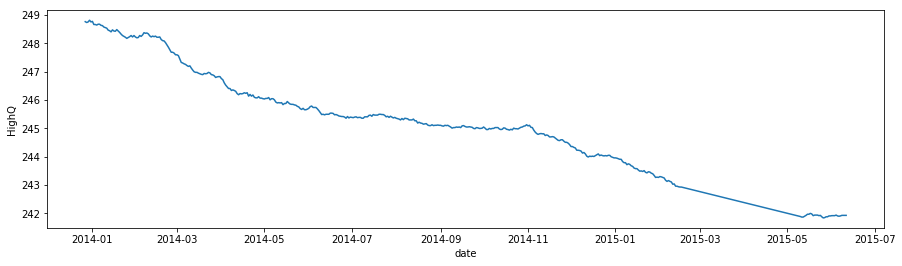

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Sort the data on state and date, then fill NA values using the `ffill` parameter. (`prices_pd` dataframe)

</div>

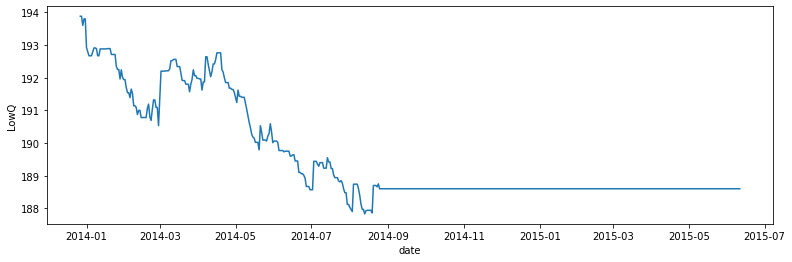

In [29]:
prices_pd.sort_values(['State', 'date'])
prices_pd = prices_pd.sort_values(["State", "date"]).reset_index(drop=True).fillna(method='ffill')
plt.figure(figsize=(13,4))
sns.lineplot(x='date', y='LowQ', data=prices_pd[prices_pd['State']=='California'])

### Finding mean, median, mode, variance, standard deviation for California

#### Mean

arithmetic average of a range of values or quantities, computed by dividing the total of all values by the number of values.

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Create a new dataframe `california_pd` that would take only California from `prices_pd` dataframe.
Then, calculate the mean `HighQ` in the new database.

</div>

In [30]:
california_pd = prices_pd[prices_pd['State']=='California'].reset_index(drop=True)

245.3761247216035

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Exercise: Find HighQ mean for 2013, 2014 & 2015 separately for `california_pd`.

*Hint:* check what this code is doing: `california_pd.iloc[0]['date'].year`

</div>

In [56]:
california_pd.groupby(california_pd.date.dt.year).mean().HighQ

date
2013    248.770000
2014    245.894231
2015    242.806625
Name: HighQ, dtype: float64

<div class="alert alert-block alert-success">
⚠️TASK 7 (difficult)
<br>

Calculate the mean `HighQ` for each state and plot it. (`prices_pd` dataframe)

</div>

#### Median

Denotes value or quantity lying at the midpoint of a frequency distribution of observed values or quantities, such that there is an equal probability of falling above or below it. Simply put, it is the *middle* value in the list of numbers.

If count is odd, the median is the value at (n+1)/2,

else it is the average of n/2 and (n+1)/2

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Plot the `HighQ` for California again. <br>
Calculate the median of `HighQ` for California. Where do you find this value on the plot?

</div>

Median price of weed in CA is: 245.31


#### Mode

It is the number which appears most often in a set of numbers. 

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Find the mode for the `HighQ` for California.

</div>

#### Variance

> Once two statistician of height 4 feet and 5 feet have to cross a river of AVERAGE depth 3 feet. Meanwhile, a third person comes and said, "what are you waiting for? You can easily cross the river"

It's the average distance of the data values from the *mean*

<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

Find the variance for `HighQ` for California. 

</div>

Variance of High Quality weed prices in CA is: 2.98268628798


#### Standard Deviation

It is the square root of variance. This will have the same units as the data and mean. 

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Find the standard deviation for `HighQ` for California. Try to find a plot in Seaborn that would allow you to plot mean values of `HighQ` for each state, together with their standard deviation.

</div>

Standard Deviation of High Quality weed prices in CA is: 1.72704553732


#### Using Pandas built-in function

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,HighQ_dev
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,245.376125,14947.073497,191.268909,16769.821826,189.783586,976.298441,2.976043
std,1.727046,1656.133565,1.524028,2433.943191,1.598252,120.246714,3.961134
min,241.840000,12021.000000,187.850000,12724.000000,187.830000,770.000000,0.000015
25%,244.480000,13610.000000,190.260000,14826.000000,188.600000,878.000000,0.106357
50%,245.310000,15037.000000,191.570000,16793.000000,188.600000,982.000000,0.729103
75%,246.220000,16090.000000,192.550000,18435.000000,191.320000,1060.000000,4.435761
max,248.820000,18492.000000,193.630000,22027.000000,193.880000,1232.000000,12.504178


#### Co-variance 

covariance as a measure of the (average) co-variation between two variables, say x and y. Covariance describes both how far the variables are spread out, and the nature of their relationship, Covariance is a measure of how much two variables change together. Compare this to Variance, which is just the range over which one measure (or variable) varies.


#### Co-variance of weed price in California vs New York

<div class="alert alert-block alert-success">
⚠️TASK 12 (difficult)
<br>

Create a dataframe, that would combine `HighQ` for both California and New York, and the date.

</div>

,CA_HighQ,date,NY_HighQ
0,248.77,2013-12-27,351.98
1,248.74,2013-12-28,351.92
2,248.76,2013-12-29,351.99
3,248.82,2013-12-30,352.02
4,248.76,2013-12-31,351.97


<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Check the covariance between California and New York `HighQ` prices.

</div>

,CA_HighQ,NY_HighQ,ca_dev,ny_dev
CA_HighQ,2.982686,5.916815,2.982686,5.916815
NY_HighQ,5.916815,12.245147,5.916815,12.245147
ca_dev,2.982686,5.916815,2.982686,5.916815
ny_dev,5.916815,12.245147,5.916815,12.245147


Covariance of the High Quality weed prices in CA and NY is: 5.91681496729


### Correlation

Extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.


#### Finding correlation between weed prices in New York and California

<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Check the correlation between California and New York `HighQ` prices. Do you remember how to interpret the results?
<br>
Plot the relationship using a pointplot in Seaborn.

</div>

,CA_HighQ,NY_HighQ,ca_dev,ny_dev
CA_HighQ,1.000000,0.979044,1.000000,0.979044
NY_HighQ,0.979044,1.000000,0.979044,1.000000
ca_dev,1.000000,0.979044,1.000000,0.979044
ny_dev,0.979044,1.000000,0.979044,1.000000


# Remember: Correlation != Causation

correlation between two variables does not necessarily imply that one causes the other.

https://www.tylervigen.com/spurious-correlations